In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, mean_absolute_error, r2_score

In [ ]:
known_frames = [
    "AI impacts on businesses, economy, and jobs",
    "AI transformations in education and research",
    "AI in national security and global partnerships",
    "AI disruptions in media and creative industries",
    "AI-based innovative solutions",
    "AI regulations, ethics, and data privacy",
    "AI competition and market dynamics in tech industries",
    "AI in healthcare and climate change",
    "AI in politics, elections, and public opinion",
    "Other",
    "Not AI related"
]

def extract_clean_frame(raw_output):
    for frame in known_frames:
        if frame.lower() in raw_output.lower():
            return frame
    return "unmatched"  # fallback if nothing matched

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
country_dfs = [
    pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Italy/intelligenza_artificiale_italy_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv('/content/drive/MyDrive/Mediacloud/Germany/künstliche_intelligenz_germany_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    pd.read_csv("/content/drive/MyDrive/Mediacloud/Brazil/inteligência_artificial_brazil_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
    #pd.read_csv('/content/drive/MyDrive/Mediacloud/USA/artificial_intelligence_usa_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    #pd.read_csv('/content/drive/MyDrive/Mediacloud/France/intelligence_artificielle_france_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
    #pd.read_csv('/content/drive/MyDrive/Mediacloud/India/artificial_intelligence_india_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
]

for df in country_dfs:
  df["frame"] = df["frame"].apply(extract_clean_frame)

In [ ]:
pd.read_csv('/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
pd.read_csv('/content/drive/MyDrive/Mediacloud/Italy/intelligenza_artificiale_italy_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
pd.read_csv('/content/drive/MyDrive/Mediacloud/Germany/künstliche_intelligenz_germany_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
pd.read_csv("/content/drive/MyDrive/Mediacloud/Brazil/inteligência_artificial_brazil_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
pd.read_csv('/content/drive/MyDrive/Mediacloud/USA/artificial_intelligence_usa_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
pd.read_csv('/content/drive/MyDrive/Mediacloud/France/intelligence_artificielle_france_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
pd.read_csv('/content/drive/MyDrive/Mediacloud/India/artificial_intelligence_india_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv'),
pd.read_csv("/content/drive/MyDrive/Mediacloud/China/人工智能_china_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
pd.read_csv("/content/drive/MyDrive/Mediacloud/Japan/人工知能_japan_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
pd.read_csv("/content/drive/MyDrive/Mediacloud/Russia/искусственный_интеллект_russia_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),
pd.read_csv("/content/drive/MyDrive/Mediacloud/artificial_intelligence_combined_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv"),

In [ ]:
# Load labeled dataset
df = pd.read_csv("/content/drive/MyDrive/Mediacloud/Brazil/inteligência_artificial_brazil_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv")
df["frame"] = df["frame"].apply(extract_clean_frame)
df['sentiment'] = df['sentiment'].replace('error', pd.NA)
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

# Drop rows with NaN in the 'sentiment' column
df.dropna(subset=['sentiment'], inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df["maintext"], df["frame"], test_size=0.3, random_state=42)
#For sentiment, swap frame with sentiment in your labeled dataset

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=2000, min_df=3, max_df=0.8, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train classifier
clf = LogisticRegression(max_iter=300)
clf.fit(X_train_tfidf, y_train)

# Predict
y_pred = clf.predict(X_test_tfidf)

# Evaluation
print(classification_report(y_test, y_pred))

# Display confusion matrix
#cm = confusion_matrix(y_test, y_pred)

#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
#disp.plot()
#plt.xticks(rotation=50, ha='right')
#plt.show()

                                                       precision    recall  f1-score   support

AI competition and market dynamics in tech industries       0.45      0.23      0.30        22
      AI disruptions in media and creative industries       0.93      0.80      0.86        50
          AI impacts on businesses, economy, and jobs       0.50      0.86      0.64        65
                  AI in healthcare and climate change       0.00      0.00      0.00        10
      AI in national security and global partnerships       0.00      0.00      0.00        17
        AI in politics, elections, and public opinion       0.67      0.11      0.18        19
             AI regulations, ethics, and data privacy       0.51      0.81      0.63        52
         AI transformations in education and research       0.90      0.43      0.58        21
                        AI-based innovative solutions       0.44      0.42      0.43        40
                                                O

In [ ]:
# Load labeled dataset
df = pd.read_csv("/content/drive/MyDrive/Mediacloud/Brazil/inteligência_artificial_brazil_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv")
df["frame"] = df["frame"].apply(extract_clean_frame)
df['sentiment'] = df['sentiment'].replace('error', pd.NA)
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

# Drop rows with NaN in the 'sentiment' column
df.dropna(subset=['sentiment'], inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df["maintext"], df["frame"], test_size=0.3, random_state=42)
#For sentiment, swap frame with sentiment in your labeled dataset

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=2000, min_df=3, max_df=0.8, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train classifier
clf = RandomForestClassifier(n_estimators=200, random_state=42) # Using RandomForestClassifier
clf.fit(X_train_tfidf, y_train)

# Predict
y_pred = clf.predict(X_test_tfidf)

# Evaluation
print(classification_report(y_test, y_pred))

# Display confusion matrix
#cm = confusion_matrix(y_test, y_pred)

#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
#disp.plot()
#plt.xticks(rotation=50, ha='right')
#plt.show()

                                                       precision    recall  f1-score   support

AI competition and market dynamics in tech industries       0.38      0.14      0.20        22
      AI disruptions in media and creative industries       0.98      0.80      0.88        50
          AI impacts on businesses, economy, and jobs       0.50      0.86      0.63        65
                  AI in healthcare and climate change       0.00      0.00      0.00        10
      AI in national security and global partnerships       0.00      0.00      0.00        17
        AI in politics, elections, and public opinion       0.67      0.21      0.32        19
             AI regulations, ethics, and data privacy       0.52      0.85      0.64        52
         AI transformations in education and research       0.78      0.33      0.47        21
                        AI-based innovative solutions       0.41      0.38      0.39        40
                                                O

In [ ]:
# Load labeled dataset
df = pd.read_csv("/content/drive/MyDrive/Mediacloud/China/人工智能_china_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv")
df["frame"] = df["frame"].apply(extract_clean_frame)
df['sentiment'] = df['sentiment'].replace('error', pd.NA)
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

# Drop rows with NaN in the 'sentiment' column
df.dropna(subset=['sentiment'], inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df["maintext"], df["frame"], test_size=0.3, random_state=42)
#For sentiment, swap frame with sentiment in your labeled dataset

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=2000, min_df=3, max_df=0.8, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train classifier
clf = LogisticRegression(max_iter=300)
clf.fit(X_train_tfidf, y_train)

# Predict
y_pred = clf.predict(X_test_tfidf)

# Evaluation
print(classification_report(y_test, y_pred))

# Display confusion matrix
#cm = confusion_matrix(y_test, y_pred)

#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
#disp.plot()
#plt.xticks(rotation=50, ha='right')
#plt.show()

                                                 precision    recall  f1-score   support

AI disruptions in media and creative industries       0.00      0.00      0.00         1
    AI impacts on businesses, economy, and jobs       0.51      0.58      0.54        83
            AI in healthcare and climate change       0.00      0.00      0.00         5
AI in national security and global partnerships       0.57      0.82      0.67        77
  AI in politics, elections, and public opinion       0.00      0.00      0.00         2
       AI regulations, ethics, and data privacy       0.00      0.00      0.00        18
   AI transformations in education and research       1.00      0.07      0.12        15
                  AI-based innovative solutions       0.43      0.43      0.43        67
                                          Other       0.00      0.00      0.00         5

                                       accuracy                           0.52       273
                   

In [ ]:
# Load labeled dataset
df = pd.read_csv("/content/drive/MyDrive/Mediacloud/China/人工智能_china_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv")
df["frame"] = df["frame"].apply(extract_clean_frame)
df['sentiment'] = df['sentiment'].replace('error', pd.NA)
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

# Drop rows with NaN in the 'sentiment' column
df.dropna(subset=['sentiment'], inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df["maintext"], df["frame"], test_size=0.3, random_state=42)
#For sentiment, swap frame with sentiment in your labeled dataset

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=2000, min_df=3, max_df=0.8, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train classifier
clf = RandomForestClassifier(n_estimators=200, random_state=42) # Using RandomForestClassifier
clf.fit(X_train_tfidf, y_train)

# Predict
y_pred = clf.predict(X_test_tfidf)

# Evaluation
print(classification_report(y_test, y_pred))

# Display confusion matrix
#cm = confusion_matrix(y_test, y_pred)

#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
#disp.plot()
#plt.xticks(rotation=50, ha='right')
#plt.show()

                                                 precision    recall  f1-score   support

AI disruptions in media and creative industries       0.00      0.00      0.00         1
    AI impacts on businesses, economy, and jobs       0.55      0.61      0.58        83
            AI in healthcare and climate change       0.00      0.00      0.00         5
AI in national security and global partnerships       0.62      0.81      0.70        77
  AI in politics, elections, and public opinion       0.00      0.00      0.00         2
       AI regulations, ethics, and data privacy       0.67      0.22      0.33        18
   AI transformations in education and research       0.75      0.20      0.32        15
                  AI-based innovative solutions       0.46      0.48      0.47        67
                                          Other       0.00      0.00      0.00         5

                                       accuracy                           0.56       273
                   

In [ ]:
# Load labeled dataset
df = pd.read_csv("/content/drive/MyDrive/Mediacloud/France/intelligence_artificielle_france_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv")
df["frame"] = df["frame"].apply(extract_clean_frame)
df['sentiment'] = df['sentiment'].replace('error', pd.NA)
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

# Drop rows with NaN in the 'sentiment' column
df.dropna(subset=['sentiment'], inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df["maintext"], df["frame"], test_size=0.3, random_state=42)
#For sentiment, swap frame with sentiment in your labeled dataset

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=2000, min_df=3, max_df=0.8, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train classifier
clf = LogisticRegression(max_iter=300)
clf.fit(X_train_tfidf, y_train)

# Predict
y_pred = clf.predict(X_test_tfidf)

# Evaluation
print(classification_report(y_test, y_pred))

# Display confusion matrix
#cm = confusion_matrix(y_test, y_pred)

#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
#disp.plot()
#plt.xticks(rotation=50, ha='right')
#plt.show()

                                                       precision    recall  f1-score   support

AI competition and market dynamics in tech industries       0.72      0.49      0.58        37
      AI disruptions in media and creative industries       0.57      0.41      0.48        41
          AI impacts on businesses, economy, and jobs       0.47      0.51      0.49        43
                  AI in healthcare and climate change       0.00      0.00      0.00        17
      AI in national security and global partnerships       0.40      0.12      0.19        16
        AI in politics, elections, and public opinion       0.62      0.45      0.53        22
             AI regulations, ethics, and data privacy       0.34      0.74      0.46        47
         AI transformations in education and research       0.00      0.00      0.00        13
                        AI-based innovative solutions       0.58      0.70      0.63        60
                                                O

In [ ]:
# Load labeled dataset
df = pd.read_csv("/content/drive/MyDrive/Mediacloud/France/intelligence_artificielle_france_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv")
df["frame"] = df["frame"].apply(extract_clean_frame)
df['sentiment'] = df['sentiment'].replace('error', pd.NA)
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

# Drop rows with NaN in the 'sentiment' column
df.dropna(subset=['sentiment'], inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df["maintext"], df["frame"], test_size=0.3, random_state=42)
#For sentiment, swap frame with sentiment in your labeled dataset

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=2000, min_df=3, max_df=0.8, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train classifier
clf = RandomForestClassifier(n_estimators=200, random_state=42) # Using RandomForestClassifier
clf.fit(X_train_tfidf, y_train)

# Predict
y_pred = clf.predict(X_test_tfidf)

# Evaluation
print(classification_report(y_test, y_pred))

# Display confusion matrix
#cm = confusion_matrix(y_test, y_pred)

#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
#disp.plot()
#plt.xticks(rotation=50, ha='right')
#plt.show()

                                                       precision    recall  f1-score   support

AI competition and market dynamics in tech industries       0.56      0.38      0.45        37
      AI disruptions in media and creative industries       0.85      0.41      0.56        41
          AI impacts on businesses, economy, and jobs       0.48      0.53      0.51        43
                  AI in healthcare and climate change       0.00      0.00      0.00        17
      AI in national security and global partnerships       0.50      0.06      0.11        16
        AI in politics, elections, and public opinion       0.59      0.45      0.51        22
             AI regulations, ethics, and data privacy       0.33      0.66      0.44        47
         AI transformations in education and research       1.00      0.23      0.38        13
                        AI-based innovative solutions       0.51      0.77      0.61        60
                                                O

In [ ]:
# Load labeled dataset
df = pd.read_csv("/content/drive/MyDrive/Mediacloud/Germany/künstliche_intelligenz_germany_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv")
df["frame"] = df["frame"].apply(extract_clean_frame)
df['sentiment'] = df['sentiment'].replace('error', pd.NA)
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

# Drop rows with NaN in the 'sentiment' column
df.dropna(subset=['sentiment'], inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df["maintext"], df["frame"], test_size=0.3, random_state=42)
#For sentiment, swap frame with sentiment in your labeled dataset

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=2000, min_df=3, max_df=0.8, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train classifier
clf = LogisticRegression(max_iter=300)
clf.fit(X_train_tfidf, y_train)

# Predict
y_pred = clf.predict(X_test_tfidf)

# Evaluation
print(classification_report(y_test, y_pred))

# Display confusion matrix
#cm = confusion_matrix(y_test, y_pred)

#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
#disp.plot()
#plt.xticks(rotation=50, ha='right')
#plt.show()

                                                       precision    recall  f1-score   support

AI competition and market dynamics in tech industries       0.50      0.07      0.12        29
      AI disruptions in media and creative industries       0.58      0.26      0.36        27
          AI impacts on businesses, economy, and jobs       0.43      0.95      0.59        95
                  AI in healthcare and climate change       0.00      0.00      0.00        10
      AI in national security and global partnerships       1.00      0.09      0.17        11
        AI in politics, elections, and public opinion       1.00      0.13      0.24        15
             AI regulations, ethics, and data privacy       0.56      0.44      0.49        50
         AI transformations in education and research       1.00      0.40      0.57        15
                        AI-based innovative solutions       0.64      0.35      0.45        46
                                                O

In [ ]:
# Load labeled dataset
df = pd.read_csv("/content/drive/MyDrive/Mediacloud/Germany/künstliche_intelligenz_germany_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv")
df["frame"] = df["frame"].apply(extract_clean_frame)
df['sentiment'] = df['sentiment'].replace('error', pd.NA)
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

# Drop rows with NaN in the 'sentiment' column
df.dropna(subset=['sentiment'], inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df["maintext"], df["frame"], test_size=0.3, random_state=42)
#For sentiment, swap frame with sentiment in your labeled dataset

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=2000, min_df=3, max_df=0.8, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train classifier
clf = RandomForestClassifier(n_estimators=200, random_state=42) # Using RandomForestClassifier
clf.fit(X_train_tfidf, y_train)

# Predict
y_pred = clf.predict(X_test_tfidf)

# Evaluation
print(classification_report(y_test, y_pred))

# Display confusion matrix
#cm = confusion_matrix(y_test, y_pred)

#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
#disp.plot()
#plt.xticks(rotation=50, ha='right')
#plt.show()

                                                       precision    recall  f1-score   support

AI competition and market dynamics in tech industries       0.50      0.03      0.06        29
      AI disruptions in media and creative industries       0.73      0.30      0.42        27
          AI impacts on businesses, economy, and jobs       0.41      0.97      0.58        95
                  AI in healthcare and climate change       0.33      0.10      0.15        10
      AI in national security and global partnerships       0.50      0.09      0.15        11
        AI in politics, elections, and public opinion       1.00      0.07      0.12        15
             AI regulations, ethics, and data privacy       0.57      0.34      0.42        50
         AI transformations in education and research       0.80      0.27      0.40        15
                        AI-based innovative solutions       0.71      0.37      0.49        46
                                                O

In [ ]:
# Load labeled dataset
df = pd.read_csv("/content/drive/MyDrive/Mediacloud/India/artificial_intelligence_india_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv")
df["frame"] = df["frame"].apply(extract_clean_frame)
df['sentiment'] = df['sentiment'].replace('error', pd.NA)
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

# Drop rows with NaN in the 'sentiment' column
df.dropna(subset=['sentiment'], inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df["maintext"], df["frame"], test_size=0.3, random_state=42)
#For sentiment, swap frame with sentiment in your labeled dataset

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=2000, min_df=3, max_df=0.8, ngram_range=(1,2), stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train classifier
clf = LogisticRegression(max_iter=300)
clf.fit(X_train_tfidf, y_train)

# Predict
y_pred = clf.predict(X_test_tfidf)

# Evaluation
print(classification_report(y_test, y_pred))

# Display confusion matrix
#cm = confusion_matrix(y_test, y_pred)

#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
#disp.plot()
#plt.xticks(rotation=50, ha='right')
#plt.show()

                                                       precision    recall  f1-score   support

AI competition and market dynamics in tech industries       0.45      0.40      0.42        35
      AI disruptions in media and creative industries       0.00      0.00      0.00         5
          AI impacts on businesses, economy, and jobs       0.48      0.94      0.63        84
                  AI in healthcare and climate change       1.00      0.33      0.50        15
      AI in national security and global partnerships       0.88      0.39      0.55        38
        AI in politics, elections, and public opinion       1.00      0.33      0.50         3
             AI regulations, ethics, and data privacy       0.73      0.30      0.42        27
         AI transformations in education and research       0.95      0.53      0.68        36
                        AI-based innovative solutions       0.53      0.48      0.50        54
                                                O

In [ ]:
# Load labeled dataset
df = pd.read_csv("/content/drive/MyDrive/Mediacloud/India/artificial_intelligence_india_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv")
df["frame"] = df["frame"].apply(extract_clean_frame)
df['sentiment'] = df['sentiment'].replace('error', pd.NA)
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

# Drop rows with NaN in the 'sentiment' column
df.dropna(subset=['sentiment'], inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df["maintext"], df["frame"], test_size=0.3, random_state=42)
#For sentiment, swap frame with sentiment in your labeled dataset

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=2000, min_df=3, max_df=0.8, ngram_range=(1,2), stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train classifier
clf = RandomForestClassifier(n_estimators=200, random_state=42) # Using RandomForestClassifier
clf.fit(X_train_tfidf, y_train)

# Predict
y_pred = clf.predict(X_test_tfidf)

# Evaluation
print(classification_report(y_test, y_pred))

# Display confusion matrix
#cm = confusion_matrix(y_test, y_pred)

#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
#disp.plot()
#plt.xticks(rotation=50, ha='right')
#plt.show()

                                                       precision    recall  f1-score   support

AI competition and market dynamics in tech industries       0.46      0.34      0.39        35
      AI disruptions in media and creative industries       0.00      0.00      0.00         5
          AI impacts on businesses, economy, and jobs       0.47      0.94      0.62        84
                  AI in healthcare and climate change       1.00      0.33      0.50        15
      AI in national security and global partnerships       0.82      0.37      0.51        38
        AI in politics, elections, and public opinion       1.00      0.33      0.50         3
             AI regulations, ethics, and data privacy       0.86      0.22      0.35        27
         AI transformations in education and research       0.85      0.61      0.71        36
                        AI-based innovative solutions       0.55      0.50      0.52        54
                                                O

In [ ]:
# Load labeled dataset
df = pd.read_csv("/content/drive/MyDrive/Mediacloud/Italy/intelligenza_artificiale_italy_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv")
df["frame"] = df["frame"].apply(extract_clean_frame)
df['sentiment'] = df['sentiment'].replace('error', pd.NA)
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

# Drop rows with NaN in the 'sentiment' column
df.dropna(subset=['sentiment'], inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df["maintext"], df["frame"], test_size=0.3, random_state=42)
#For sentiment, swap frame with sentiment in your labeled dataset

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=2000, min_df=3, max_df=0.8, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train classifier
clf = LogisticRegression(max_iter=300)
clf.fit(X_train_tfidf, y_train)

# Predict
y_pred = clf.predict(X_test_tfidf)

# Evaluation
print(classification_report(y_test, y_pred))

# Display confusion matrix
#cm = confusion_matrix(y_test, y_pred)

#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
#disp.plot()
#plt.xticks(rotation=50, ha='right')
#plt.show()

                                                       precision    recall  f1-score   support

AI competition and market dynamics in tech industries       0.70      0.26      0.38        27
      AI disruptions in media and creative industries       0.56      0.24      0.33        21
          AI impacts on businesses, economy, and jobs       0.47      0.94      0.62        85
                  AI in healthcare and climate change       0.90      0.41      0.56        22
      AI in national security and global partnerships       1.00      0.08      0.15        12
        AI in politics, elections, and public opinion       0.00      0.00      0.00         8
             AI regulations, ethics, and data privacy       0.63      0.52      0.57        33
         AI transformations in education and research       0.86      0.60      0.71        30
                        AI-based innovative solutions       0.48      0.41      0.44        59
                                                O

In [ ]:
# Load labeled dataset
df = pd.read_csv("/content/drive/MyDrive/Mediacloud/Italy/intelligenza_artificiale_italy_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv")
df["frame"] = df["frame"].apply(extract_clean_frame)
df['sentiment'] = df['sentiment'].replace('error', pd.NA)
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

# Drop rows with NaN in the 'sentiment' column
df.dropna(subset=['sentiment'], inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df["maintext"], df["frame"], test_size=0.3, random_state=42)
#For sentiment, swap frame with sentiment in your labeled dataset

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=2000, min_df=3, max_df=0.8, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train classifier
clf = RandomForestClassifier(n_estimators=200, random_state=42) # Using RandomForestClassifier
clf.fit(X_train_tfidf, y_train)

# Predict
y_pred = clf.predict(X_test_tfidf)

# Evaluation
print(classification_report(y_test, y_pred))

# Display confusion matrix
#cm = confusion_matrix(y_test, y_pred)

#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
#disp.plot()
#plt.xticks(rotation=50, ha='right')
#plt.show()

                                                       precision    recall  f1-score   support

AI competition and market dynamics in tech industries       0.50      0.15      0.23        27
      AI disruptions in media and creative industries       0.29      0.10      0.14        21
          AI impacts on businesses, economy, and jobs       0.44      0.94      0.60        85
                  AI in healthcare and climate change       0.93      0.64      0.76        22
      AI in national security and global partnerships       0.00      0.00      0.00        12
        AI in politics, elections, and public opinion       0.00      0.00      0.00         8
             AI regulations, ethics, and data privacy       0.55      0.33      0.42        33
         AI transformations in education and research       0.89      0.57      0.69        30
                        AI-based innovative solutions       0.53      0.42      0.47        59
                                                O

In [ ]:
# Load labeled dataset
df = pd.read_csv("/content/drive/MyDrive/Mediacloud/Japan/人工知能_japan_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv")
df["frame"] = df["frame"].apply(extract_clean_frame)
df['sentiment'] = df['sentiment'].replace('error', pd.NA)
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

# Drop rows with NaN in the 'sentiment' column
df.dropna(subset=['sentiment'], inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df["maintext"], df["frame"], test_size=0.3, random_state=42)
#For sentiment, swap frame with sentiment in your labeled dataset

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=2000, min_df=3, max_df=0.8, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train classifier
clf = LogisticRegression(max_iter=300)
clf.fit(X_train_tfidf, y_train)

# Predict
y_pred = clf.predict(X_test_tfidf)

# Evaluation
print(classification_report(y_test, y_pred))

# Display confusion matrix
#cm = confusion_matrix(y_test, y_pred)

#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
#disp.plot()
#plt.xticks(rotation=50, ha='right')
#plt.show()

                                                       precision    recall  f1-score   support

AI competition and market dynamics in tech industries       0.00      0.00      0.00        17
      AI disruptions in media and creative industries       0.00      0.00      0.00         9
          AI impacts on businesses, economy, and jobs       0.47      0.72      0.57       130
                  AI in healthcare and climate change       0.00      0.00      0.00        15
      AI in national security and global partnerships       0.00      0.00      0.00         9
        AI in politics, elections, and public opinion       0.00      0.00      0.00         4
             AI regulations, ethics, and data privacy       0.00      0.00      0.00        15
         AI transformations in education and research       0.00      0.00      0.00        22
                        AI-based innovative solutions       0.27      0.35      0.30        75
                                                O

In [ ]:
# Load labeled dataset
df = pd.read_csv("/content/drive/MyDrive/Mediacloud/Japan/人工知能_japan_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv")
df["frame"] = df["frame"].apply(extract_clean_frame)
df['sentiment'] = df['sentiment'].replace('error', pd.NA)
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

# Drop rows with NaN in the 'sentiment' column
df.dropna(subset=['sentiment'], inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df["maintext"], df["frame"], test_size=0.3, random_state=42)
#For sentiment, swap frame with sentiment in your labeled dataset

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=2000, min_df=3, max_df=0.8, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train classifier
clf = RandomForestClassifier(n_estimators=200, random_state=42) # Using RandomForestClassifier
clf.fit(X_train_tfidf, y_train)

# Predict
y_pred = clf.predict(X_test_tfidf)

# Evaluation
print(classification_report(y_test, y_pred))

# Display confusion matrix
#cm = confusion_matrix(y_test, y_pred)

#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
#disp.plot()
#plt.xticks(rotation=50, ha='right')
#plt.show()

                                                       precision    recall  f1-score   support

AI competition and market dynamics in tech industries       0.25      0.06      0.10        17
      AI disruptions in media and creative industries       0.00      0.00      0.00         9
          AI impacts on businesses, economy, and jobs       0.49      0.68      0.57       130
                  AI in healthcare and climate change       0.00      0.00      0.00        15
      AI in national security and global partnerships       0.00      0.00      0.00         9
        AI in politics, elections, and public opinion       0.00      0.00      0.00         4
             AI regulations, ethics, and data privacy       0.12      0.20      0.15        15
         AI transformations in education and research       0.00      0.00      0.00        22
                        AI-based innovative solutions       0.27      0.33      0.30        75
                                                O

In [ ]:
# Load labeled dataset
df = pd.read_csv("/content/drive/MyDrive/Mediacloud/Russia/искусственный_интеллект_russia_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv")
df["frame"] = df["frame"].apply(extract_clean_frame)
df['sentiment'] = df['sentiment'].replace('error', pd.NA)
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

# Drop rows with NaN in the 'sentiment' column
df.dropna(subset=['sentiment'], inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df["maintext"], df["frame"], test_size=0.3, random_state=42)
#For sentiment, swap frame with sentiment in your labeled dataset

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=2000, min_df=3, max_df=0.8, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train classifier
clf = LogisticRegression(max_iter=300)
clf.fit(X_train_tfidf, y_train)

# Predict
y_pred = clf.predict(X_test_tfidf)

# Evaluation
print(classification_report(y_test, y_pred))

# Display confusion matrix
#cm = confusion_matrix(y_test, y_pred)

#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
#disp.plot()
#plt.xticks(rotation=50, ha='right')
#plt.show()

                                                       precision    recall  f1-score   support

AI competition and market dynamics in tech industries       0.00      0.00      0.00         7
      AI disruptions in media and creative industries       0.75      0.32      0.45        28
          AI impacts on businesses, economy, and jobs       0.42      0.79      0.55        70
                  AI in healthcare and climate change       0.75      0.13      0.22        23
      AI in national security and global partnerships       0.71      0.33      0.45        30
        AI in politics, elections, and public opinion       1.00      0.20      0.33        10
             AI regulations, ethics, and data privacy       0.67      0.32      0.43        25
         AI transformations in education and research       0.78      0.42      0.55        33
                        AI-based innovative solutions       0.40      0.61      0.49        70
                                                O

In [ ]:
# Load labeled dataset
df = pd.read_csv("/content/drive/MyDrive/Mediacloud/Russia/искусственный_интеллект_russia_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv")
df["frame"] = df["frame"].apply(extract_clean_frame)
df['sentiment'] = df['sentiment'].replace('error', pd.NA)
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

# Drop rows with NaN in the 'sentiment' column
df.dropna(subset=['sentiment'], inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df["maintext"], df["frame"], test_size=0.3, random_state=42)
#For sentiment, swap frame with sentiment in your labeled dataset

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=2000, min_df=3, max_df=0.8, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train classifier
clf = RandomForestClassifier(n_estimators=200, random_state=42) # Using RandomForestClassifier
clf.fit(X_train_tfidf, y_train)

# Predict
y_pred = clf.predict(X_test_tfidf)

# Evaluation
print(classification_report(y_test, y_pred))

# Display confusion matrix
#cm = confusion_matrix(y_test, y_pred)

#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
#disp.plot()
#plt.xticks(rotation=50, ha='right')
#plt.show()

                                                       precision    recall  f1-score   support

AI competition and market dynamics in tech industries       0.00      0.00      0.00         7
      AI disruptions in media and creative industries       0.75      0.21      0.33        28
          AI impacts on businesses, economy, and jobs       0.44      0.77      0.56        70
                  AI in healthcare and climate change       0.87      0.57      0.68        23
      AI in national security and global partnerships       0.69      0.30      0.42        30
        AI in politics, elections, and public opinion       1.00      0.40      0.57        10
             AI regulations, ethics, and data privacy       0.75      0.24      0.36        25
         AI transformations in education and research       0.74      0.52      0.61        33
                        AI-based innovative solutions       0.37      0.56      0.45        70
                                                O

In [ ]:
# Load labeled dataset
df = pd.read_csv("/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv")
df["frame"] = df["frame"].apply(extract_clean_frame)
df['sentiment'] = df['sentiment'].replace('error', pd.NA)
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

# Drop rows with NaN in the 'sentiment' column
df.dropna(subset=['sentiment'], inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df["maintext"], df["frame"], test_size=0.3, random_state=42)
#For sentiment, swap frame with sentiment in your labeled dataset

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=2000, min_df=3, max_df=0.8, ngram_range=(1,2), stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train classifier
clf = LogisticRegression(max_iter=300)
clf.fit(X_train_tfidf, y_train)

# Predict
y_pred = clf.predict(X_test_tfidf)

# Evaluation
print(classification_report(y_test, y_pred))

# Display confusion matrix
#cm = confusion_matrix(y_test, y_pred)

#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
#disp.plot()
#plt.xticks(rotation=50, ha='right')
#plt.show()

                                                       precision    recall  f1-score   support

AI competition and market dynamics in tech industries       0.67      0.08      0.15        24
      AI disruptions in media and creative industries       0.67      0.25      0.36        24
          AI impacts on businesses, economy, and jobs       0.54      0.91      0.68        97
                  AI in healthcare and climate change       0.88      0.33      0.48        21
      AI in national security and global partnerships       0.33      0.08      0.13        12
        AI in politics, elections, and public opinion       1.00      0.10      0.18        10
             AI regulations, ethics, and data privacy       0.54      0.71      0.61        49
         AI transformations in education and research       1.00      0.33      0.50        12
                        AI-based innovative solutions       0.60      0.55      0.57        49
                                                O

In [ ]:
# Load labeled dataset
df = pd.read_csv("/content/drive/MyDrive/Mediacloud/UK/artificial_intelligence_uk_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv")
df["frame"] = df["frame"].apply(extract_clean_frame)
df['sentiment'] = df['sentiment'].replace('error', pd.NA)
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

# Drop rows with NaN in the 'sentiment' column
df.dropna(subset=['sentiment'], inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df["maintext"], df["frame"], test_size=0.3, random_state=42)
#For sentiment, swap frame with sentiment in your labeled dataset

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=2000, min_df=3, max_df=0.8, ngram_range=(1,2), stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train classifier
clf = RandomForestClassifier(n_estimators=200, random_state=42) # Using RandomForestClassifier
clf.fit(X_train_tfidf, y_train)

# Predict
y_pred = clf.predict(X_test_tfidf)

# Evaluation
print(classification_report(y_test, y_pred))

# Display confusion matrix
#cm = confusion_matrix(y_test, y_pred)

#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
#disp.plot()
#plt.xticks(rotation=50, ha='right')
#plt.show()

                                                       precision    recall  f1-score   support

AI competition and market dynamics in tech industries       1.00      0.04      0.08        24
      AI disruptions in media and creative industries       0.62      0.21      0.31        24
          AI impacts on businesses, economy, and jobs       0.51      0.89      0.65        97
                  AI in healthcare and climate change       0.54      0.33      0.41        21
      AI in national security and global partnerships       0.40      0.17      0.24        12
        AI in politics, elections, and public opinion       1.00      0.10      0.18        10
             AI regulations, ethics, and data privacy       0.59      0.67      0.63        49
         AI transformations in education and research       1.00      0.25      0.40        12
                        AI-based innovative solutions       0.52      0.47      0.49        49
                                                O

In [ ]:
# Load labeled dataset
df = pd.read_csv("/content/drive/MyDrive/Mediacloud/USA/artificial_intelligence_usa_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv")
df["frame"] = df["frame"].apply(extract_clean_frame)
df['sentiment'] = df['sentiment'].replace('error', pd.NA)
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

# Drop rows with NaN in the 'sentiment' column
df.dropna(subset=['sentiment'], inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df["maintext"], df["frame"], test_size=0.3, random_state=42)
#For sentiment, swap frame with sentiment in your labeled dataset

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=2000, min_df=3, max_df=0.8, ngram_range=(1,2), stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train classifier
clf = LogisticRegression(max_iter=300)
clf.fit(X_train_tfidf, y_train)

# Predict
y_pred = clf.predict(X_test_tfidf)

# Evaluation
print(classification_report(y_test, y_pred))

# Display confusion matrix
#cm = confusion_matrix(y_test, y_pred)

#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
#disp.plot()
#plt.xticks(rotation=50, ha='right')
#plt.show()

                                                       precision    recall  f1-score   support

AI competition and market dynamics in tech industries       0.72      0.38      0.49        61
      AI disruptions in media and creative industries       0.00      0.00      0.00        15
          AI impacts on businesses, economy, and jobs       0.38      0.90      0.54        78
                  AI in healthcare and climate change       1.00      0.11      0.20        18
      AI in national security and global partnerships       0.70      0.39      0.50        18
        AI in politics, elections, and public opinion       1.00      0.50      0.67        20
             AI regulations, ethics, and data privacy       0.38      0.74      0.50        27
         AI transformations in education and research       1.00      0.30      0.46        10
                        AI-based innovative solutions       0.62      0.11      0.19        44
                                                O

In [ ]:
# Load labeled dataset
df = pd.read_csv("/content/drive/MyDrive/Mediacloud/USA/artificial_intelligence_usa_cleaned_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv")
df["frame"] = df["frame"].apply(extract_clean_frame)
df['sentiment'] = df['sentiment'].replace('error', pd.NA)
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

# Drop rows with NaN in the 'sentiment' column
df.dropna(subset=['sentiment'], inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df["maintext"], df["frame"], test_size=0.3, random_state=42)
#For sentiment, swap frame with sentiment in your labeled dataset

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=2000, min_df=3, max_df=0.8, ngram_range=(1,2), stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train classifier
clf = RandomForestClassifier(n_estimators=200, random_state=42) # Using RandomForestClassifier
clf.fit(X_train_tfidf, y_train)

# Predict
y_pred = clf.predict(X_test_tfidf)

# Evaluation
print(classification_report(y_test, y_pred))

# Display confusion matrix
#cm = confusion_matrix(y_test, y_pred)

#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
#disp.plot()
#plt.xticks(rotation=50, ha='right')
#plt.show()

                                                       precision    recall  f1-score   support

AI competition and market dynamics in tech industries       0.67      0.30      0.41        61
      AI disruptions in media and creative industries       0.00      0.00      0.00        15
          AI impacts on businesses, economy, and jobs       0.39      0.92      0.55        78
                  AI in healthcare and climate change       0.50      0.11      0.18        18
      AI in national security and global partnerships       0.42      0.28      0.33        18
        AI in politics, elections, and public opinion       0.82      0.45      0.58        20
             AI regulations, ethics, and data privacy       0.36      0.63      0.46        27
         AI transformations in education and research       1.00      0.60      0.75        10
                        AI-based innovative solutions       0.83      0.11      0.20        44
                                                O

                                                       precision    recall  f1-score   support

AI competition and market dynamics in tech industries       0.69      0.36      0.47       264
      AI disruptions in media and creative industries       0.72      0.33      0.46       224
          AI impacts on businesses, economy, and jobs       0.46      0.84      0.60       824
                  AI in healthcare and climate change       0.79      0.15      0.25       176
      AI in national security and global partnerships       0.59      0.37      0.45       233
        AI in politics, elections, and public opinion       0.67      0.15      0.25       118
             AI regulations, ethics, and data privacy       0.49      0.53      0.51       357
         AI transformations in education and research       0.85      0.27      0.41       201
                        AI-based innovative solutions       0.45      0.49      0.47       534
                                                O

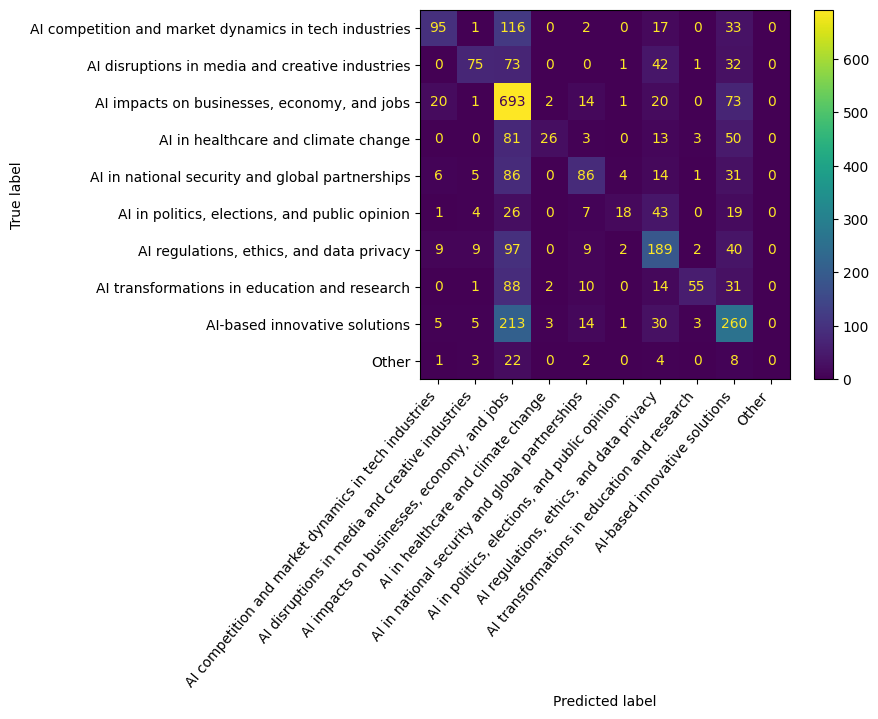

In [ ]:
# Load labeled dataset
df = pd.read_csv("/content/drive/MyDrive/Mediacloud/artificial_intelligence_combined_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv")
df["frame"] = df["frame"].apply(extract_clean_frame)
df['sentiment'] = df['sentiment'].replace('error', pd.NA)
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

# Drop rows with NaN in the 'sentiment' column
df.dropna(subset=['sentiment'], inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df["maintext"], df["frame"], test_size=0.3, random_state=42)
#For sentiment, swap frame with sentiment in your labeled dataset

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=20000, min_df=3, max_df=0.8, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train classifier
clf = LogisticRegression(max_iter=300)
clf.fit(X_train_tfidf, y_train)

# Predict
y_pred = clf.predict(X_test_tfidf)

# Evaluation
print(classification_report(y_test, y_pred))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.xticks(rotation=50, ha='right')
plt.show()

                                                       precision    recall  f1-score   support

AI competition and market dynamics in tech industries       0.69      0.26      0.38       264
      AI disruptions in media and creative industries       0.70      0.32      0.44       224
          AI impacts on businesses, economy, and jobs       0.45      0.83      0.58       824
                  AI in healthcare and climate change       0.84      0.34      0.48       176
      AI in national security and global partnerships       0.52      0.37      0.43       233
        AI in politics, elections, and public opinion       0.84      0.22      0.35       118
             AI regulations, ethics, and data privacy       0.53      0.48      0.51       357
         AI transformations in education and research       0.78      0.39      0.52       201
                        AI-based innovative solutions       0.46      0.48      0.47       534
                                                O

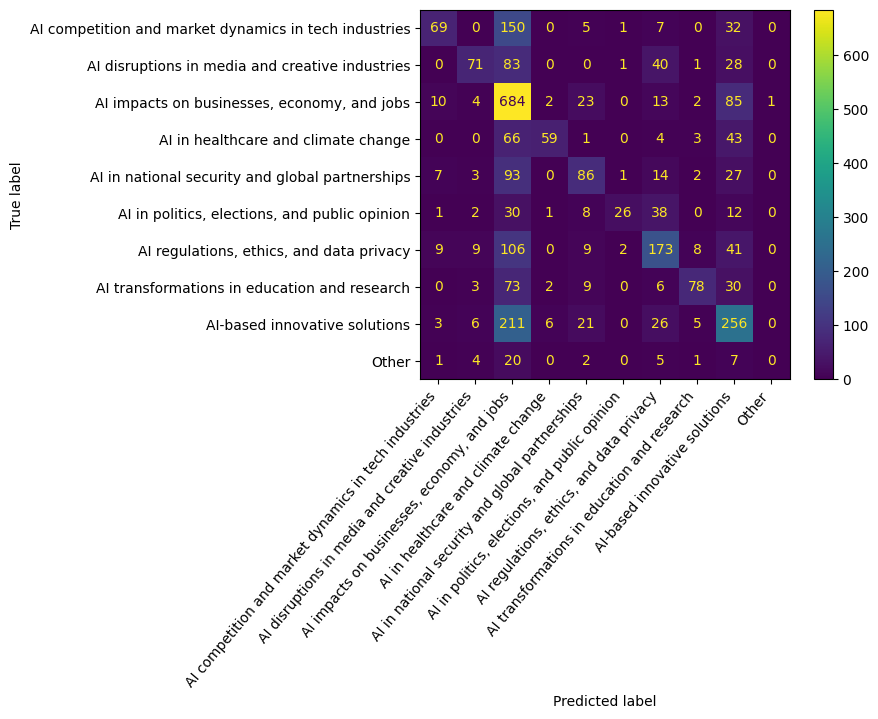

In [ ]:
# Load labeled dataset
df = pd.read_csv("/content/drive/MyDrive/Mediacloud/artificial_intelligence_combined_2024-06-01_2025-06-01_frames_sentiments_newsplease_mediacloud_gemini_2-5.csv")
df["frame"] = df["frame"].apply(extract_clean_frame)
df['sentiment'] = df['sentiment'].replace('error', pd.NA)
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

# Drop rows with NaN in the 'sentiment' column
df.dropna(subset=['sentiment'], inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df["maintext"], df["frame"], test_size=0.3, random_state=42)
#For sentiment, swap frame with sentiment in your labeled dataset

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=20000, min_df=3, max_df=0.8, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train classifier
clf = RandomForestClassifier(n_estimators=200, random_state=42) # Using RandomForestClassifier
clf.fit(X_train_tfidf, y_train)

# Predict
y_pred = clf.predict(X_test_tfidf)

# Evaluation
print(classification_report(y_test, y_pred))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.xticks(rotation=50, ha='right')
plt.show()